In [17]:
# Prueba con video 

import cv2

# Definición de la lista de nombres de clases (reemplaza esto con tus propias clases)
flores = ["alcatraz", "camelias", "girasol", "loto", "tulipan"]


# Cargar el modelo entrenado
flower_model = load_model("D:\\ferna\\IA\\Flowers\\floresM.h5py")

# Ruta al archivo de video (reemplaza esto con la ruta de tu video)
video_path = "D:\\ferna\\IA\\Flowers\\videos_comprobacion\\V2.mp4"

# Inicializar el objeto de captura de video
cap = cv2.VideoCapture(video_path)

while True:
    # Lee un fotograma del video
    ret, frame = cap.read()

    # Verifica si se ha llegado al final del video
    if not ret:
        break

    # Realiza las mismas operaciones que para una imagen individual
    # Asegúrate de que el tamaño del fotograma coincida con el tamaño de entrada del modelo
    frame = cv2.resize(frame, (50, 50))

    # Asegúrate de que el fotograma tiene las mismas dimensiones que las imágenes con las que entrenaste tu modelo
    frame = frame.reshape(1, 50, 50, 3)

    # Normaliza el fotograma si es necesario
    frame = frame / 255.0  # Normalizar entre 0 y 1, si tus imágenes originales también se normalizaron

    # Realiza la predicción
    predictions = flower_model.predict(frame)

    # Obtén la clase predicha (la clase con la probabilidad más alta)
    predicted_class = np.argmax(predictions)

    # Imprime la clase predicha
    print("El fotograma se clasifica como:", flores[predicted_class])

    # Muestra el fotograma con la clase predicha
    # cv2.imshow("Video", frame)

    # Espera 1 milisegundo y verifica si se presiona la tecla 'q' para salir del bucle
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libera los recursos
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 64ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 24ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 22ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 23ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 29ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 22ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 37ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 28ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 33ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 24ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 10ms/step
El fotog

1/1 [==============================] - 0s 20ms/step
El fotograma se clasifica como: flor_combinada
1/1 [==============================] - 0s 18ms/step
El fotograma se clasifica como: flor_combinada
1/1 [==============================] - 0s 28ms/step
El fotograma se clasifica como: flor_combinada
1/1 [==============================] - 0s 23ms/step
El fotograma se clasifica como: flor_combinada
1/1 [==============================] - 0s 21ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 20ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 22ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 16ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 10ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 17ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0

1/1 [==============================] - 0s 30ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 20ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 22ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 23ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 14ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 24ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 35ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 22ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 17ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 14ms/step
El fotograma se clasifica como: flor_rosa
1/1 [==============================] - 0s 29ms/step
El fotog

1/1 [==============================] - 0s 204ms/step


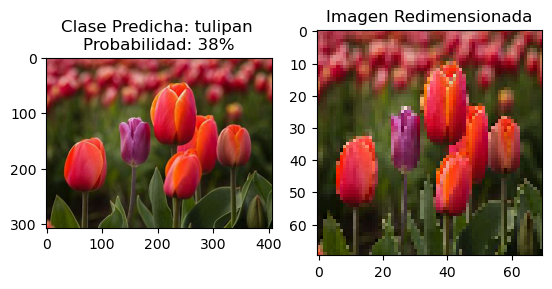

Probabilidades: [[0.0265499  0.31021088 0.22365367 0.06154352 0.3780421 ]]


In [22]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

flores = ["alcatraz", "camelias", "girasol", "loto", "tulipan"]

flower_model = load_model("D:\\ferna\\IA\\Flowers\\floresM.h5py")
#5-9-1-2-4-7
ruta_prueba = "D:\\ferna\\IA\\Flowers\\fotos_comprobacion\\I11.jpg"
new_image_path = ruta_prueba
copy_image_path = ruta_prueba

img = image.load_img(new_image_path, target_size=(70, 70))
img_array_original = image.img_to_array(img)
img_array_original /= 255.0

img_copy = image.load_img(copy_image_path)

img_array_resized_batch = np.expand_dims(img_array_original, axis=0)

predictions = flower_model.predict(img_array_resized_batch)
predicted_class = np.argmax(predictions)

plt.subplot(1, 2, 1)
plt.imshow(img_copy)
probHighest = round(np.max(predictions)*100)
plt.title(f"Clase Predicha: {flores[predicted_class]} \nProbabilidad: {probHighest}%")

plt.subplot(1, 2, 2)
plt.imshow(img_array_original)
plt.title("Imagen Redimensionada")
plt.show()

print("Probabilidades:", predictions)

